<a href="https://colab.research.google.com/github/Sophiajackrich/Hamoye_Repo/blob/main/Hamoye_stage_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [28]:
pip install opencv-python

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from matplotlib.image import imread

In [16]:
# Load MNIST dataset
#from tensorflow.keras.layers import mnist
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,)


Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [19]:
# Loading the train datasets
train = pd.read_csv("/content/train_v2.csv")
print(train.shape)
train.head()


(40479, 2)


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [20]:
# Loading the test datasets
test = pd.read_csv("/content/test_v2_file_mapping.csv")
print(test.shape)
test.head()


(20522, 2)


,old,new
0,file_4158.tif,file_18830.tif
1,file_1668.tif,file_19164.tif
2,file_2411.tif,file_15749.tif
3,file_16047.tif,file_7531.tif
4,file_1271.tif,file_18347.tif


Explorative Data Analysis

In [ ]:
from matplotlib.image import imread
import cv2
# Viewing image
plt.figure(figsize=(20,20))
# define location of dataset
images = train
# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # define filename
  filename = images + 'train_' + str(i) + '.jpg'
  # load image pixels
  image = imread(filename)
  # plot raw pixel data
  plt.imshow(image)
# show the figure
plt.show()

In [36]:
#get number of unique classes in the train dataset
train['tags'].nunique()

449

In [37]:
gc.collect() #Frequently used to avoid session crashing due to memory exhaustion

20565

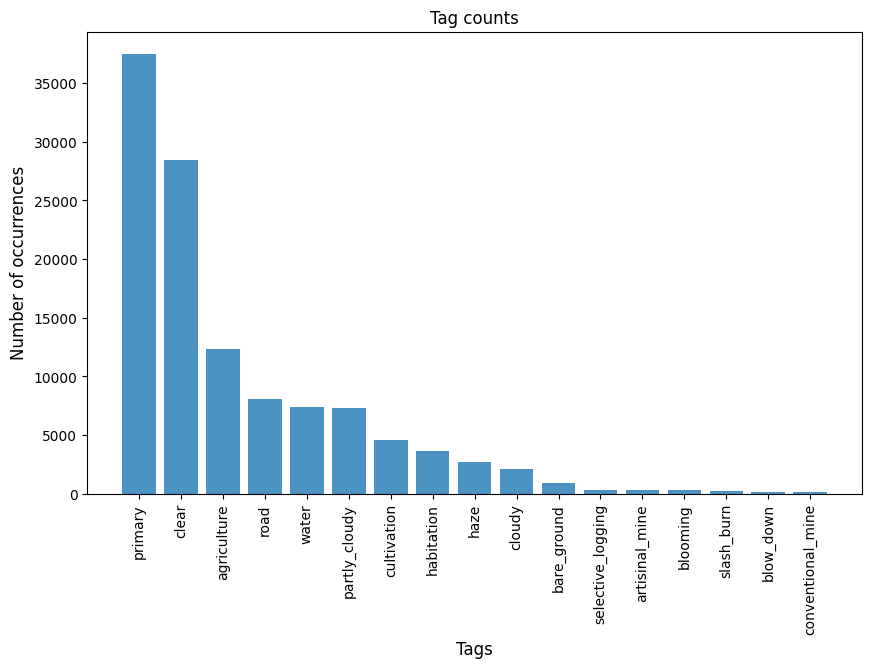

In [38]:
# Tags present in the dataset
tags = train['tags'].apply(lambda x: x.split(' '))
tags = [item for sublist in tags for item in sublist]
tag_counts = pd.Series(tags).value_counts()

# Plot the tags
plt.figure(figsize=(10,6))
plt.bar(tag_counts.index, tag_counts.values, alpha=0.8)
plt.title('Tag counts')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Tags', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [40]:
labels = set()
def splitting_tags(tags):
    '''
    Takes in tags column, splits the tags and store as a set
    '''
    [labels.add(tag) for tag in tags.split()]

# Create a copy of `train_df`
train_df = train.copy()
train_df['tags'].apply(splitting_tags)
labels = list(labels)
print(labels)

['haze', 'road', 'partly_cloudy', 'selective_logging', 'bare_ground', 'cultivation', 'water', 'blooming', 'habitation', 'clear', 'slash_burn', 'cloudy', 'artisinal_mine', 'primary', 'agriculture', 'conventional_mine', 'blow_down']


In [41]:
##One hot encoding is performed on the labels in train classes
for tag in labels:
    train_df[tag] = train_df['tags'].apply(lambda x: 1 if tag in x.split() else 0)

## adding .jpg extension to the column image_name so as to have same name format as the image files
train_df['image_name'] = train_df['image_name'].apply(lambda x: '{}.jpg'.format(x))
train_df.head()

,image_name,tags,haze,road,partly_cloudy,selective_logging,bare_ground,cultivation,water,blooming,habitation,clear,slash_burn,cloudy,artisinal_mine,primary,agriculture,conventional_mine,blow_down
0,train_0.jpg,haze primary,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,train_1.jpg,agriculture clear primary water,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,train_2.jpg,clear primary,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,train_3.jpg,clear primary,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0


In [47]:
# Define the columns
col = list(train_df.columns[2:])
col

['haze',
 'road',
 'partly_cloudy',
 'selective_logging',
 'bare_ground',
 'cultivation',
 'water',
 'blooming',
 'habitation',
 'clear',
 'slash_burn',
 'cloudy',
 'artisinal_mine',
 'primary',
 'agriculture',
 'conventional_mine',
 'blow_down']

Modelling

In [53]:
# Initializing imagedatagenerator with a validation split of 0.2
train_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.2)

In [77]:
# Generating train data generator
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory =train,
                                                    x_col='image_name', y_col=col, subset='training',
                                                    batch_size=32,seed=42, shuffle=True,
                                                    class_mode='raw', target_size=(128,128))

AttributeError: ignored

In [72]:
#generating validation data which is expected to be 20% of the train dataset since validation split is 0.2
val_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                  directory =train,
                                                  x_col='image_name', y_col=col, subset='validation',
                                                  batch_size=32,seed=42, shuffle=True),
                                                  class_mode='raw', target_size=(128,128))

ValueError: ignored

In [79]:
#setting up step size for training and validation image data
step_train_size = int(np.ceil(train_datagen.samples / train_datagen.batch_size))
#step_val_size = int(np.ceil(val_generator.samples / val_generator.batch_size))

AttributeError: ignored